<a href="https://colab.research.google.com/github/Gunateja653/Heart-Disease-Prediction/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
heart=pd.read_csv("/content/heart.csv")

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
heart["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [8]:
heart["sex"].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [9]:
heart["cp"].value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

In [7]:
heart.shape

(1025, 14)

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
duplicate_rows=heart[heart.duplicated()]

In [17]:
duplicate_rows.shape

(723, 14)

In [18]:
duplicate_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


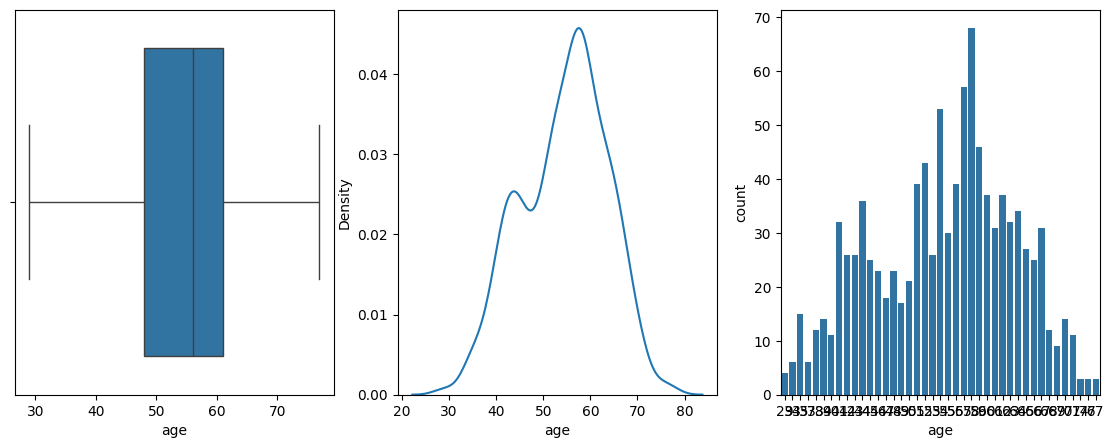

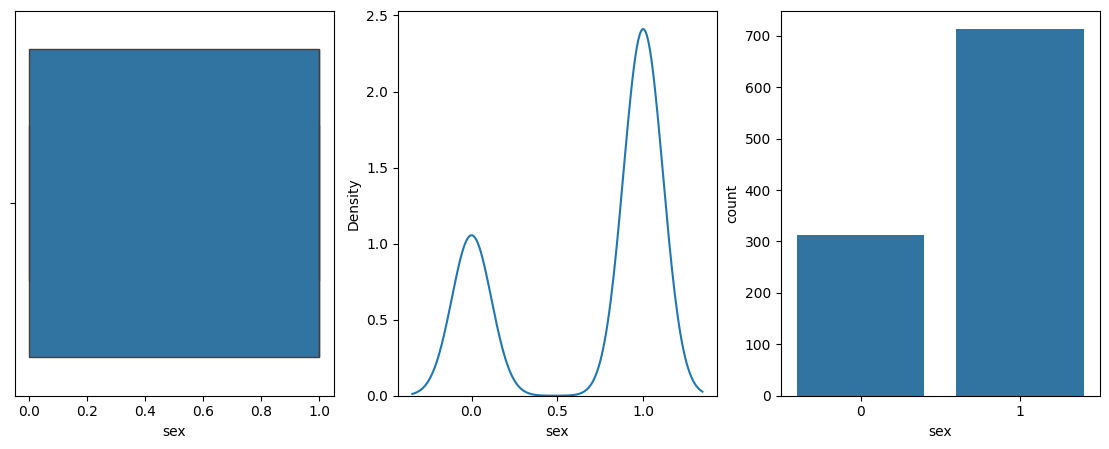

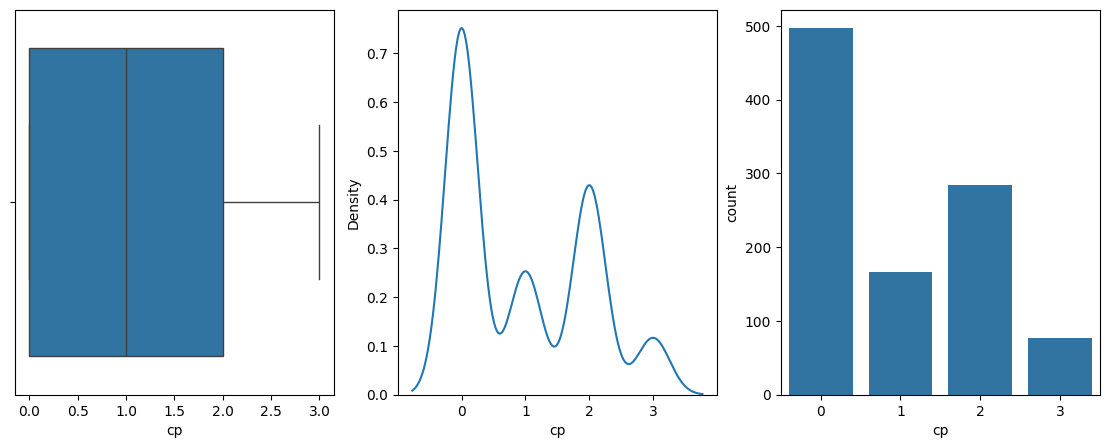

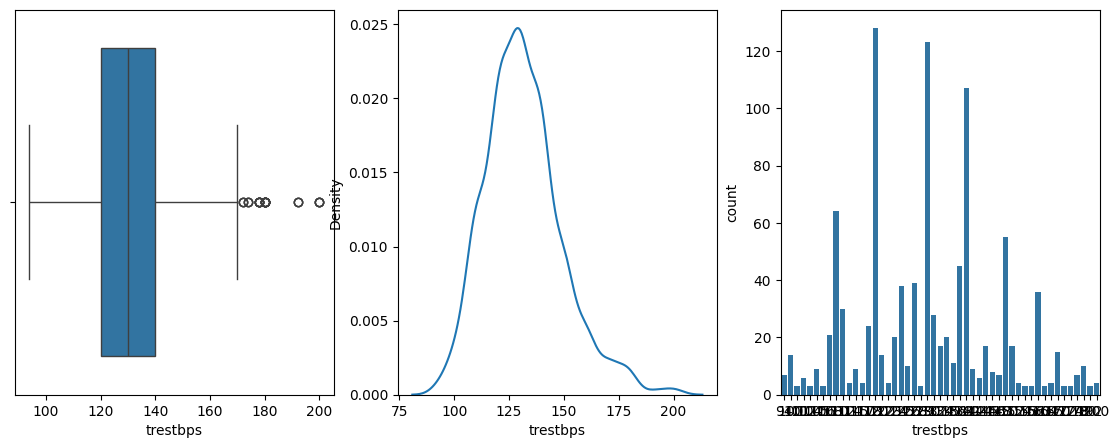

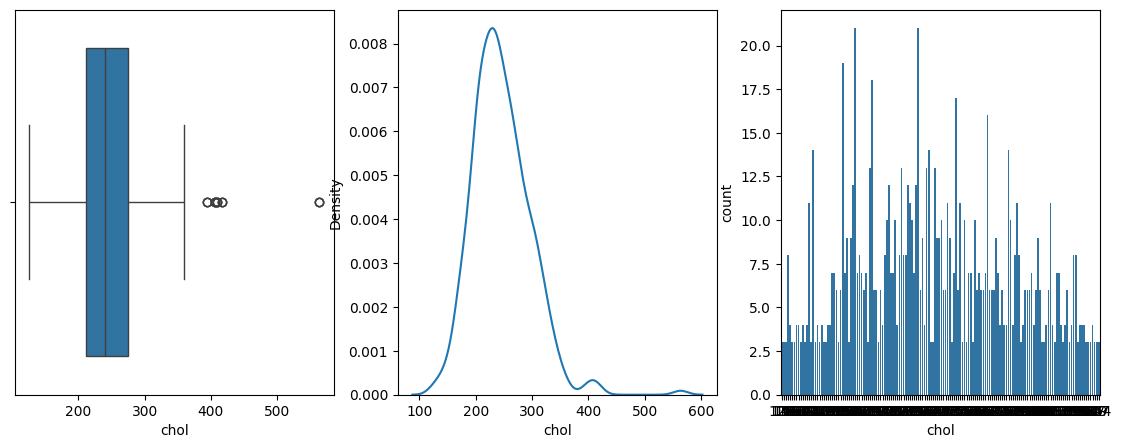

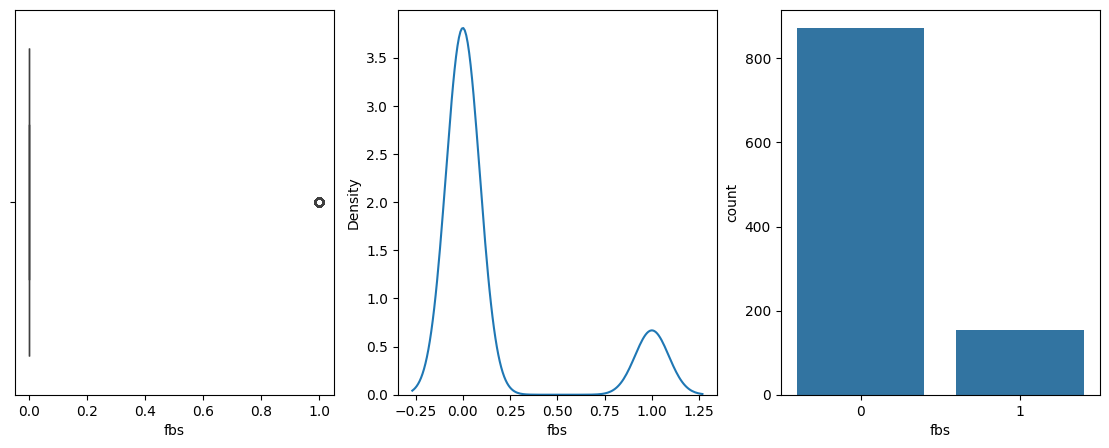

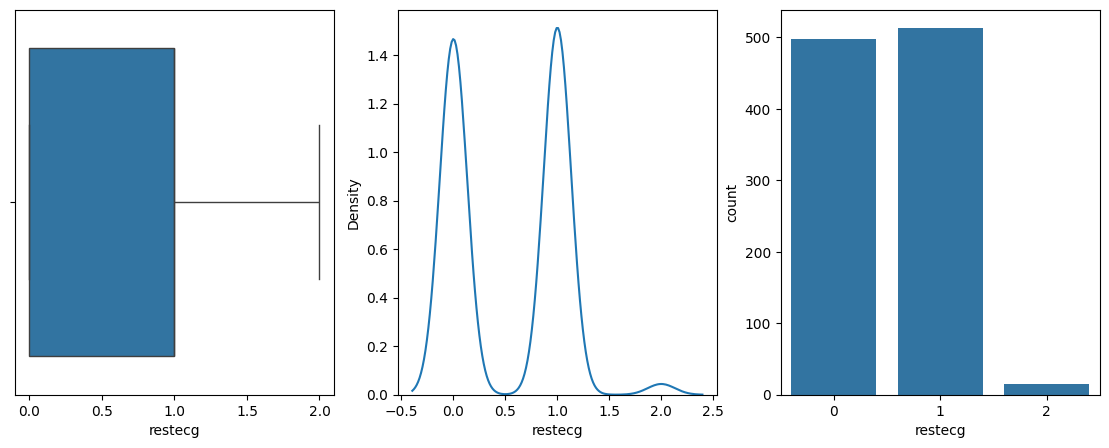

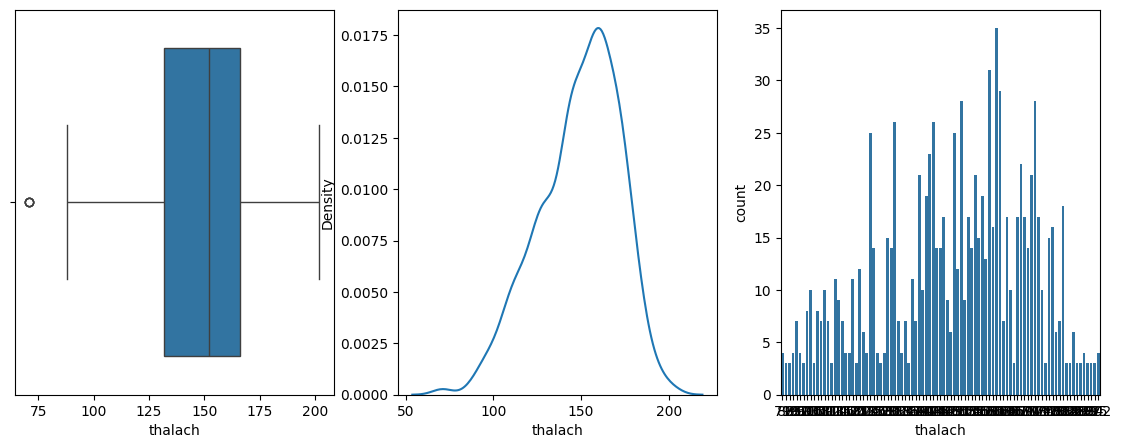

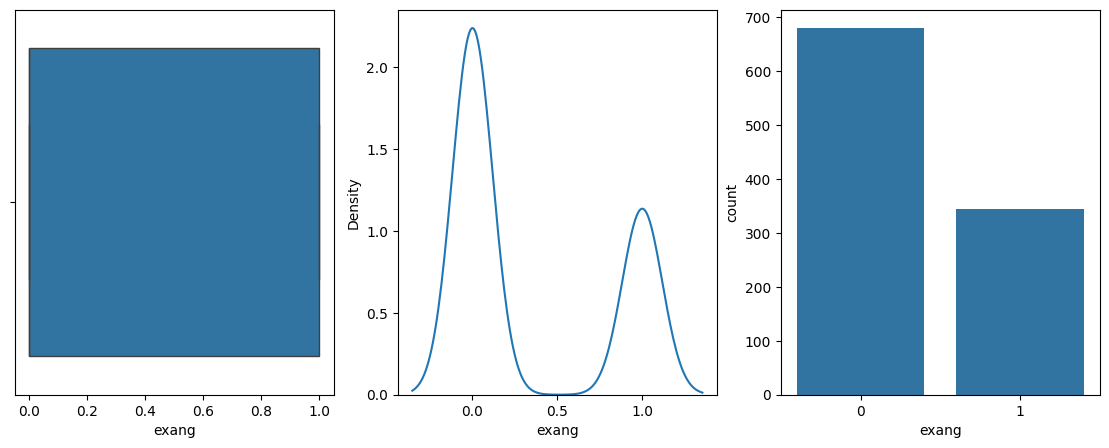

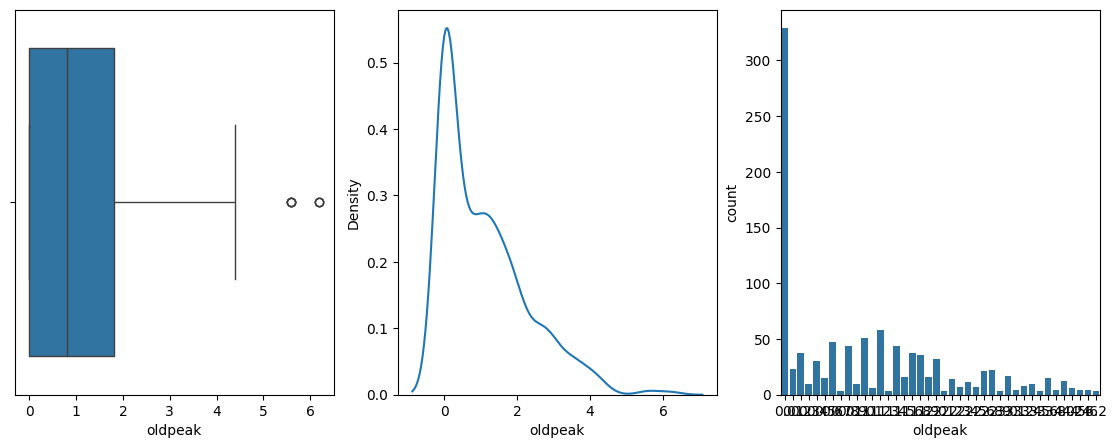

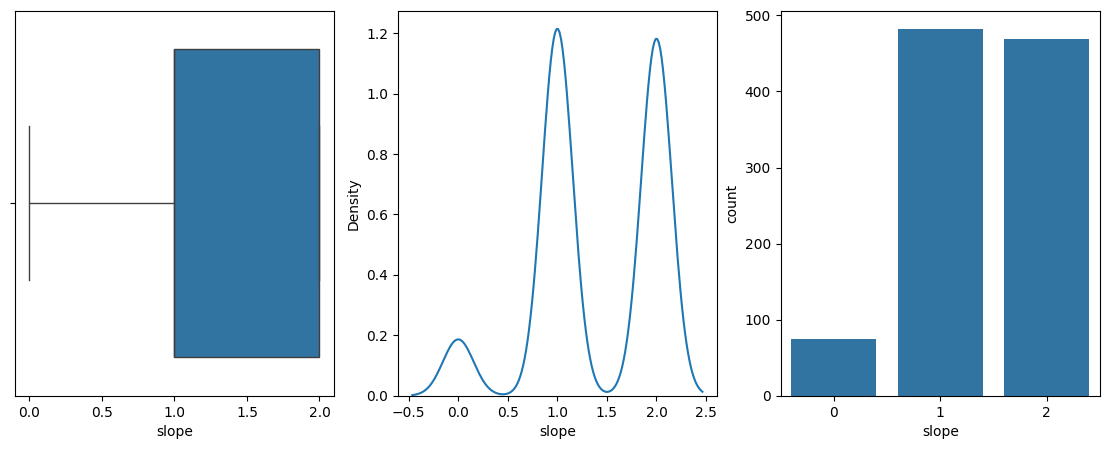

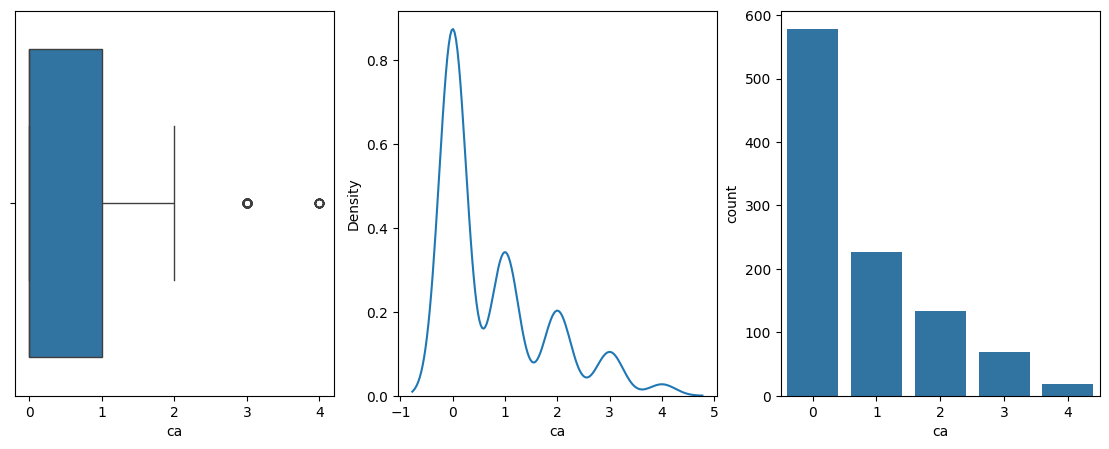

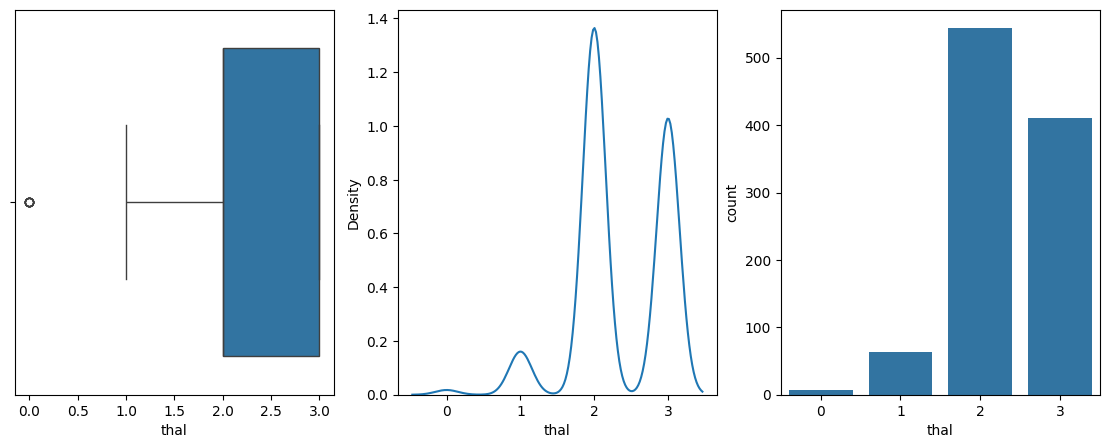

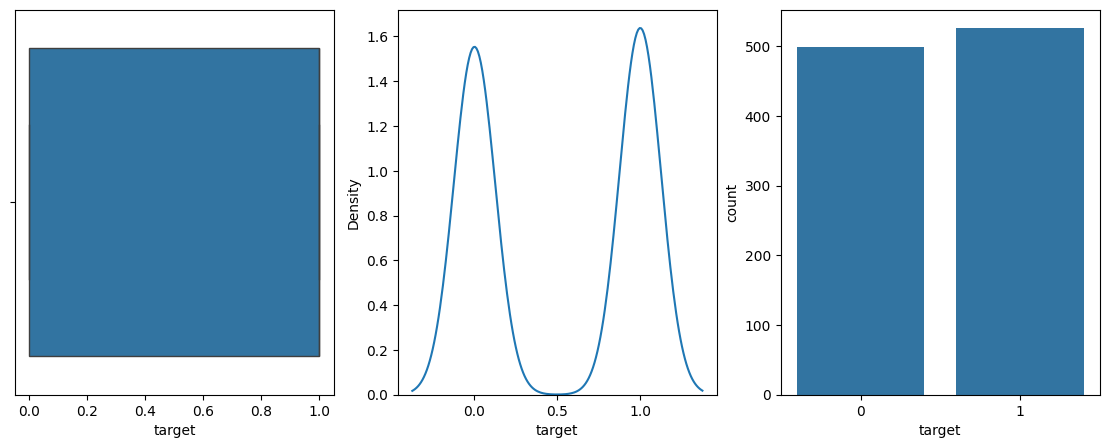

In [25]:
for i in heart.columns:
  plt.show()
  plt.figure(figsize=(14,5))
  plt.subplot(1,3,1)
  sns.boxplot(data=heart,x=i)
  plt.subplot(1,3,2)
  sns.kdeplot(data=heart,x=i)
  plt.subplot(1,3,3)
  sns.countplot(data=heart,x=i)
  plt.show()

In [27]:
for k,v in heart.items():  #k=keys(columns names) ,v=values(columns values)
  q1=v.quantile(0.25)
  q3=v.quantile(0.75)
  iqr=q3-q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(heart)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 0.00%
Column sex outliers = 0.00%
Column cp outliers = 0.00%
Column trestbps outliers = 4.39%
Column chol outliers = 1.56%
Column fbs outliers = 100.00%
Column restecg outliers = 0.00%
Column thalach outliers = 0.39%
Column exang outliers = 0.00%
Column oldpeak outliers = 0.68%
Column slope outliers = 0.00%
Column ca outliers = 8.49%
Column thal outliers = 0.68%
Column target outliers = 0.00%


In [28]:
heart["fbs"].value_counts()

fbs
0    872
1    153
Name: count, dtype: int64

In [71]:
heart.rename(columns={'cp':'Chest Pain type chest pain type','chol':"cholestoral in mg/dl",'thalach':'resting blood pressure (in mm Hg)','oldpeak':' ST depression induced by exercise relative to rest','ca':'number of major vessels (0-3)'},inplace=True)

In [72]:
x=heart.drop("target",axis=1)
y=heart["target"]

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [74]:
from sklearn.feature_selection import chi2,SelectKBest
select=SelectKBest(chi2,k=5)
select.fit(x_train,y_train)
x_train.columns[select.get_support()]


Index(['Chest Pain type chest pain type', 'cholestoral in mg/dl',
       'resting blood pressure (in mm Hg)',
       ' ST depression induced by exercise relative to rest',
       'number of major vessels (0-3)'],
      dtype='object')

In [75]:
x=heart[['Chest Pain type chest pain type', 'cholestoral in mg/dl',
       'resting blood pressure (in mm Hg)',
       ' ST depression induced by exercise relative to rest',
       'number of major vessels (0-3)']]
y=heart["target"]

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [63]:
from sklearn.metrics import accuracy_score

def model(model):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(accuracy_score(y_test,y_pred)*100)

In [64]:
from sklearn.linear_model import LogisticRegression
model(LogisticRegression())

79.51219512195122


In [65]:
from sklearn.svm import SVC
model(SVC())

67.8048780487805


In [66]:
from sklearn.ensemble import RandomForestClassifier
model(RandomForestClassifier())

100.0


In [67]:
from xgboost import XGBClassifier
model(XGBClassifier())

100.0


In [68]:
from sklearn.tree import DecisionTreeClassifier
model(DecisionTreeClassifier())

100.0


In [69]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
list_1=[]
for i in x_train.columns:
  list_1.append(float(input(f"enter the value of {i}: ")))
list=np.array(list_1).reshape(1,-1)
result=model.predict(list)
if result==0:
  print("no heart disease")
else:
  print("heart disease")

enter the value of Chest Pain type chest pain type: 0
enter the value of cholestoral in mg/dl: 212
enter the value of resting blood pressure (in mm Hg): 168
enter the value of  ST depression induced by exercise relative to rest: 1
enter the value of number of major vessels (0-3): 2
no heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
